<a href="https://colab.research.google.com/github/CESARIUX2596/CS-Master/blob/master/Artificial_Vision_Final_Torres_Cesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guitar classification
In this project we will create a model that classifies guitar by body type in realtime using the videofeed of a camera.
The body types available to clasify are the following


*   Les Paul
*   Strat
*   Telecaster
*   Acoustic
*   Ukulele




In [34]:
# Imports
import numpy as np # Operate with image
import pandas as pd # Create dataframe to feed the CNN
import pickle # Store trained model for future uses
import tensorflow as tf # Backbone of AI Architecture
import os
from tensorflow.python.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D # Inteface to tensorflow
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import cv2 # Manipulate images
from matplotlib import pyplot as plt # Display info related to the model
%matplotlib inline


## Read dataset hosted from Google Drive
Mount google drive as a device to acces the folder that contains the images that will be used to train the Convolutional Neuronal Network to classify guitar images

In [2]:
# Mount Google drive as a device
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mount folder where data is hosted
os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset")
!ls

Acoustic  Double_Cut  Les_Paul	Strat  Telecaster  Ukulele


In [4]:
print("Amount of pictures per style")
path, dirs, accoustic = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Acoustic"))
accoustic_count = len(accoustic)
print("Acoustic:" , accoustic_count)

path, dirs, double_cut = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Double_Cut"))
dc_count = len(double_cut)
print("Double Cut:" , dc_count)

path, dirs, les_paul = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Les_Paul"))
lp_count = len(les_paul)
print("Les Paul:" , lp_count)

path, dirs, telecaster = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Telecaster"))
tele_count = len(telecaster)
print("Telecaster:" , tele_count)

path, dirs, strat = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Strat"))
strat_count = len(strat)
print("Strat:" , strat_count)


path, dirs, ukulele = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Ukulele"))
ukulele_count = len(ukulele)
print("Ukulele:" , ukulele_count)


Amount of pictures per style
Acoustic: 900
Double Cut: 900
Les Paul: 900
Telecaster: 900
Strat: 900
Ukulele: 900


In [5]:
# Use the Preprocessing library from keras to perform data augmentation.
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=180, # Give a wide rotation angle for images.
    width_shift_range=0.35, # shift image from side to side
    height_shift_range=0.35, # Shift image vertically
    shear_range=0.35, # Add angle like rotation for the image
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='reflect')

In [6]:
# Start creating dataset for each label
X = []
y = []

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Acoustic")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('acoustic')
  # y.append(0)
print('Acoustic Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Double_Cut")
tmp = os.listdir()
for img_name in tmp:
  # print(img_name)
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('double_cut')
  # y.append(1)
print('Double Cut Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Les_Paul")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('les_paul')
  # y.append(2)
print('Les Paul Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Strat")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('strat')
  # y.append(3)
print('Strat Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Telecaster")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('telecaster')
  # y.append(4)
print('Telecaster Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Ukulele")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  X.append(img)
  y.append('ukulele')
  # y.append(5)
print('Ukelele finished')

print(len(X))
print(len(y))

print("DONE")

Acoustic Finished
900
900
Double Cut Finished
1800
1800
Les Paul Finished
2700
2700
Strat Finished
3600
3600
Telecaster Finished
4500
4500
Ukelele finished
5400
5400
DONE


In [7]:
print(f'We got %s featyres and %s labels' % (len(X), len(y)))

We got 5400 featyres and 5400 labels


strat
<class 'numpy.ndarray'>


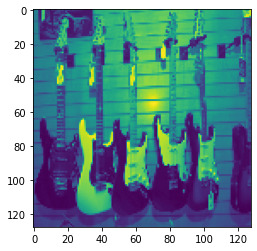

In [8]:
# Test some images to check if labels correspond to image
plt.imshow(X[2913])
print(y[2913])
print(type(X[2913]))

In [84]:
# Create Dictionary with the arrays
data = {'Guitar ':X,'Style':y}
# Create dataframe with dictionary
X_features = pd.DataFrame(data)
X_features.head()
# df.shape

,Guitar,Style
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",acoustic
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",acoustic
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",acoustic
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",acoustic
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",acoustic


In [86]:
y_labels = pd.get_dummies(X_features.Style)
X_features= X_features.drop('Style',axis = 1)
# df = df.join(one_hot)


AttributeError: ignored

In [87]:
print(X_features.shape)
print(y_labels.shape)

(5400, 1)
(5400, 6)


In [106]:
# Shuffe Dataframe
X_features = X_features.sample(frac=1, random_state=13).reset_index(drop=True)
y_labels = y_labels.sample(frac=1, random_state=13).reset_index(drop=True)
# Separate into Train, Test and Validation Sets
X_train, X_validate, X_test = \
              np.split(X_features.sample(frac=1, random_state=42), 
                       [int(.6*len(X_features)), int(.8*len(X_features))])
y_train, y_validate, y_test = \
              np.split(y_labels.sample(frac=1, random_state=42), 
                       [int(.6*len(y_labels)), int(.8*len(y_labels))])

In [107]:

print(f"Length of Training Features %s"%len(X_train))
print(f"Length of Training Labes %s"%len(y_train))
print(f"Length of Validation Features = %s"%len(X_validate))
print(f"Length of Validation Labes = %s"%len(y_validate))
print(f"Length of Testing Features = %s"%len(X_test))
print(f"Length of Testing Labels = %s"%len(y_test))

Length of Training Features 3240
Length of Training Labes 3240
Length of Validation Features = 1080
Length of Validation Labes = 1080
Length of Testing Features = 1080
Length of Testing Labels = 1080


In [108]:
# plt.imshow(np.asarray(X_train.iloc[2913]))
print(X_train.iloc[2913])
print(X_train.iloc[2913].shape)
# print(y_train.iloc[2913])
# print(type(X[2913]))

Guitar     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: 3245, dtype: object
(1,)


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [109]:
X_train = np.asarray(X_train)
# X_train = np.expand_dims(X_train, -1)

y_train = np.asarray(y_train)
# y_train = np.expand_dims(y_train, -1)
print(X_train.shape)
print(y_train.shape)

(3240, 1)
(3240, 6)


In [110]:
model.fit(X_train,y_train,batch_size=50,epochs=70)

ValueError: ignored